In [560]:
#Importation des bibliothèqes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [561]:
df = pd.read_csv("../data/data_merge.csv")

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

C:\Users\UGO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(65948, 39)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'typ_boite_nb_rapp', 'conso_urb',
       'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl',
       'masse_ordma_min', 'masse_ordma_max', 'champ_v9', 'Carrosserie',
       'gamme', 'Country', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'Cn', 'Ct', 'r',
       'm (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)'],
      dtype='object')
      lib_mrq lib_mod_doss lib_mod                        dscom cod_cbr  \
0  ALFA-ROMEO          159     159         159 2.0 JTDm (170ch)      GO   
1  ALFA-ROMEO          159     159     159 2.0 JTDm (170ch) ECO      GO   
2  ALFA-ROMEO          159     159      159 SW 2.0 JTDm (170ch)      GO   
3  ALFA-ROMEO          159     159      159 SW 2.0 JTDm (170ch)      GO   
4  ALFA-ROMEO          159     159  159 SW 2.0 JTDm (170ch) ECO      GO   

  hybride  puiss_admin_98 puiss_max t

**Transformation des données quantitatives**

Le type de certaines données quantitatives sont des chaînes de caractères alors que cela devrait être des flottants.
Ainsi on change le type de ces données (il faut également transformer le '.' en ','.

In [562]:
df["puiss_max"] = df["puiss_max"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_urb"] = df["conso_urb"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_exurb"] = df["conso_exurb"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_mixte"] = df["conso_mixte"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["co_typ_1"] = df["co_typ_1"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["nox"] = df["nox"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["ptcl"] = df["ptcl"].apply(lambda x: str(x).replace(",", ".")).astype("float64")

**Etude de "r"**

In [563]:
print(df.shape)
df = df.drop(["r"],axis=1)
print(df.shape)

(65948, 39)
(65948, 38)


In [564]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(65948, 38)
12012
(53936, 38)
0


**Etude de "ep (kW)" et "puiss_max"**

Ces 2 variables sont similaires et donnent des informations sur la puissance maximale du moteur.

In [568]:
print(df[["ep (KW)","puiss_max"]].isnull().sum())
print(df[["ep (KW)","puiss_max"]].describe())

print(df[["ep (KW)","puiss_max"]])

ep (KW)      12814
puiss_max        0
dtype: int64
            ep (KW)     puiss_max
count  41122.000000  53936.000000
mean      87.583362     88.544946
std       29.689369     30.793590
min       10.000000     10.000000
25%       66.000000     66.000000
50%       81.000000     84.000000
75%       97.000000    103.000000
max      419.000000    419.000000
       ep (KW)  puiss_max
0          NaN      125.0
1          NaN      125.0
2          NaN      125.0
3          NaN      125.0
4          NaN      125.0
5          NaN      331.0
6          NaN      147.0
7          NaN      147.0
8          NaN      147.0
9          NaN      147.0
11         NaN      147.0
12         NaN      147.0
13         NaN      147.0
16         NaN      147.0
17         NaN      125.0
18         NaN      125.0
19         NaN      125.0
20         NaN      125.0
21         NaN      125.0
25         NaN      125.0
26         NaN      125.0
27         NaN      125.0
28         NaN      125.0
29         NaN     

In [569]:
df_ep_not_null = df[["ep (KW)","puiss_max"]].loc[~df["ep (KW)"].isnull()]
print(df_ep_not_null.isnull().sum())
print(df_ep_not_null.shape)
print((df_ep_not_null["ep (KW)"] == df_ep_not_null["puiss_max"]).sum())
print((np.abs(df_ep_not_null["ep (KW)"] - df_ep_not_null["puiss_max"])).describe())
print((np.abs(df_ep_not_null["ep (KW)"] - df_ep_not_null["puiss_max"]) > 10).sum())

ep (KW)      0
puiss_max    0
dtype: int64
(41122, 2)
40254
count    41122.000000
mean         0.147118
std          1.911414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
dtype: float64
196


In [570]:
print(df.shape)
df = df.loc[(np.abs(df["ep (KW)"] - df["puiss_max"]) < 10) | (df["ep (KW)"].isnull())]
print(df.shape)
df = df.drop(["ep (KW)"],axis=1)
print(df.shape)

(53936, 38)
(53722, 38)
(53722, 37)


**Etude de "ec (cm3)"**

On supprime les valeurs considérées comme extrêmes

In [572]:
print(df["ec (cm3)"].isnull().sum())
print(df["ec (cm3)"].describe())


Q1 = df["ec (cm3)"].describe()["25%"]
Q3 = df["ec (cm3)"].describe()["75%"]
IQR = Q3-Q1
print(IQR)
limit_basse = Q1-IQR*1.5
limit_haute = Q3+IQR*1.5
print(limit_basse)
print(limit_haute)
df_ec_faible = df.loc[df["ec (cm3)"] < 800]
print(df_ec_faible.shape[0])
df_ec_haute = df.loc[df["ec (cm3)"] > 3000]
print(df_ec_haute.shape[0])

757
count    52965.000000
mean      1561.698065
std        373.368484
min          0.000000
25%       1398.000000
50%       1560.000000
75%       1598.000000
max       8400.000000
Name: ec (cm3), dtype: float64
200.0
1098.0
1898.0
14
75


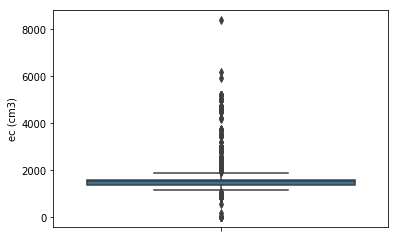

In [573]:
sns.boxplot(y=df["ec (cm3)"])

(53722, 37)
(52965, 37)


(array([1.3000e+01, 1.0000e+00, 1.1440e+04, 2.9705e+04, 8.8380e+03,
        2.5230e+03, 1.0000e+01, 3.6200e+02, 2.5000e+01, 1.0000e+00,
        9.0000e+00, 2.3000e+01, 1.2000e+01, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  420.,  840., 1260., 1680., 2100., 2520., 2940., 3360.,
        3780., 4200., 4620., 5040., 5460., 5880., 6300., 6720., 7140.,
        7560., 7980., 8400.]),
 <a list of 20 Patch objects>)

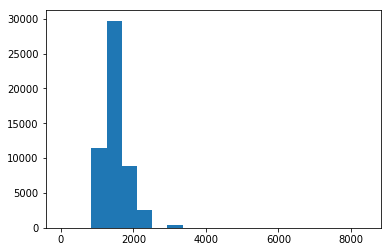

In [574]:
print(df.shape)
df = df.loc[~df["ec (cm3)"].isnull()]
print(df.shape)
plt.hist(df["ec (cm3)"],bins=20)

In [575]:
print(df.shape)
df = df.loc[(df["ec (cm3)"] > 800) & (df["ec (cm3)"] < 3000)]
print(df.shape)

(52965, 37)
(52876, 37)


**Etude de "Ft" et "cod_cbr", puis 'Fm'**

In [576]:
print(df["Ft"].value_counts())
print(df["cod_cbr"].value_counts())

Diesel             26479
Petrol             14350
DIESEL              3169
petrol              2648
PETROL              2350
diesel              2208
LPG                  598
Diesel-Electric       40
NG-Biomethane          6
ELECTRIC               4
                       3
Electric               3
DIESEL-ELECTRIC        1
Biodiesel              1
petrol-electric        1
Name: Ft, dtype: int64
GO       32272
ES       19649
GH         347
GP/ES      285
ES/GP      285
GL          32
GN/ES        3
ES/GN        3
Name: cod_cbr, dtype: int64


In [577]:
to_replace = ["DIESEL","petrol","diesel","PETROL","electric","ELECTRIC","DIESEL-ELECTRIC"]
value = ["Diesel","Petrol","Diesel","Petrol","Electric","Electric","Diesel-Electric"]
df["Ft"] = df["Ft"].replace(to_replace=to_replace,value=value)
print(df["Ft"].value_counts())
print(df["cod_cbr"].value_counts())
print(df[["Ft","cod_cbr"]].isnull().sum())

Diesel             31856
Petrol             19348
LPG                  598
Diesel-Electric       41
Electric               7
NG-Biomethane          6
                       3
Biodiesel              1
petrol-electric        1
Name: Ft, dtype: int64
GO       32272
ES       19649
GH         347
GP/ES      285
ES/GP      285
GL          32
GN/ES        3
ES/GN        3
Name: cod_cbr, dtype: int64
Ft         1015
cod_cbr       0
dtype: int64


In [578]:
pd.crosstab(df["Ft"],df['cod_cbr'])

cod_cbr,ES,ES/GN,ES/GP,GH,GL,GN/ES,GO,GP/ES
Ft,,,,,,,,
,1,0,0,0,0,0,2,0
Biodiesel,0,0,0,0,0,0,1,0
Diesel,72,0,0,305,1,0,31478,0
Diesel-Electric,0,0,0,14,27,0,0,0
Electric,1,0,0,5,1,0,0,0
LPG,28,0,285,0,0,0,0,285
NG-Biomethane,0,3,0,0,0,3,0,0
Petrol,19279,0,0,1,2,0,66,0
petrol-electric,0,0,0,0,1,0,0,0


In [579]:
print(df["Fm"].value_counts())

M    51155
B      611
F        1
Name: Fm, dtype: int64


In [580]:
print(df.shape)
df = df.drop(["Ft","Fm"],axis=1)
print(df.shape)


(52876, 37)
(52876, 35)


In [581]:
print(df["cod_cbr"].isnull().sum())

0


**Etude "W (mm)", "At1 (mm)" et "At2 (mm)"**

In [587]:
print(df["W (mm)"].describe())
print(df["W (mm)"].isnull().sum())

count    52303.000000
mean      2663.086400
std        186.366912
min        695.000000
25%       2589.000000
50%       2647.000000
75%       2776.000000
max       4813.000000
Name: W (mm), dtype: float64
573


In [588]:
print(df.shape)
df = df.loc[~df["W (mm)"].isnull()]
print(df.shape)

(52876, 35)
(52303, 35)


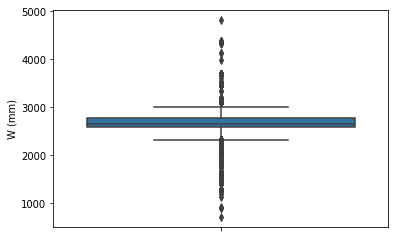

In [589]:
sns.boxplot(y=df["W (mm)"])

In [590]:
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())
print(df[["At1 (mm)","At2 (mm)"]].describe())

           At1 (mm)      At2 (mm)
count  51874.000000  47839.000000
mean    1546.515287   1539.379753
std      143.420817    140.905959
min      695.000000    850.000000
25%     1497.000000   1486.000000
50%     1536.000000   1531.000000
75%     1574.000000   1556.000000
max     3122.000000   3122.000000
At1 (mm)     429
At2 (mm)    4464
dtype: int64


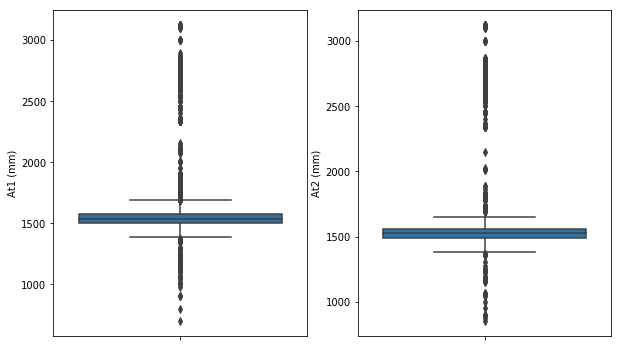

In [585]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["At1 (mm)"])
plt.subplot(1,2,2)
sns.boxplot(y=df["At2 (mm)"])

In [586]:
axle_diff = np.abs(df["At2 (mm)"]-df["At1 (mm)"])
print(axle_diff.describe())
print((axle_diff > 500).sum())

count    47839.000000
mean        13.019064
std         23.317744
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max       1156.000000
dtype: float64
16


In [591]:
print(df.shape)
df = df.loc[~df["At1 (mm)"].isnull()]
print(df.shape)

(52303, 35)
(51874, 35)


In [596]:
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())
df["At2 (mm)"].loc[df["At2 (mm)"].isnull()] = df["At1 (mm)"].loc[df["At2 (mm)"].isnull()]
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())

At1 (mm)       0
At2 (mm)    4041
dtype: int64
At1 (mm)    0
At2 (mm)    0
dtype: int64


**Etude de "Enedc (g/km)" et "co2"**

In [598]:
print(df[["Enedc (g/km)","co2"]].describe())
print((df["Enedc (g/km)"] == df["co2"]).sum())
print(df[["Enedc (g/km)","co2"]].isnull().sum())


       Enedc (g/km)           co2
count  51863.000000  51874.000000
mean     126.415865    125.556560
std       26.123749     25.326957
min       48.000000     48.000000
25%      105.000000    105.000000
50%      120.000000    120.000000
75%      144.000000    140.000000
max      571.000000    250.000000
42261
Enedc (g/km)    11
co2              0
dtype: int64


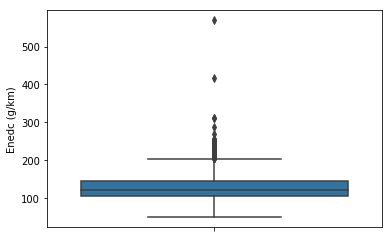

In [599]:
sns.boxplot(y=df["Enedc (g/km)"])

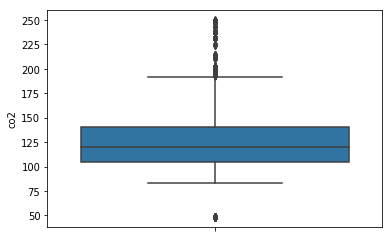

In [600]:
sns.boxplot(y=df["co2"])

0      3.0
2      3.0
3      3.0
777    2.0
778    2.0
dtype: float64
count    9602.000000
mean        7.595084
std         9.572802
min         1.000000
25%         4.000000
50%         5.000000
75%        10.000000
max       427.000000
dtype: float64
325
AxesSubplot(0.125,0.125;0.775x0.755)


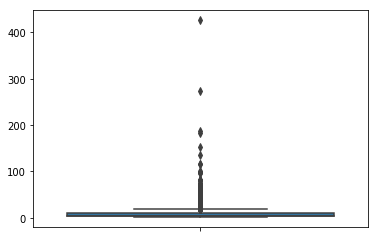

In [601]:
df_different_co2 = df[["Enedc (g/km)","co2"]].loc[df["Enedc (g/km)"] != df["co2"]]
df_different_co2 = np.abs(df_different_co2["Enedc (g/km)"]-df_different_co2["co2"])
print(df_different_co2.head())
print(df_different_co2.describe())
print((df_different_co2 > 20).sum())

print(sns.boxplot(y=df_different_co2))

In [602]:
print(df.shape)
df = df.loc[(np.abs(df["Enedc (g/km)"] - df["co2"]) < 20) ]
print(df.shape)
df = df.drop(["Enedc (g/km)"],axis=1)
print(df.shape)

(51874, 35)
(51401, 35)
(51401, 34)


In [603]:
print(df["co2"].describe())
print(df["co2"].isnull().sum())

count    51401.000000
mean       125.394272
std         25.297110
min         48.000000
25%        105.000000
50%        120.000000
75%        140.000000
max        250.000000
Name: co2, dtype: float64
0


**Etude de "m (kg)","masse_ordma_min" et "masse_ordma_max"**

In [604]:
print(df[["m (kg)","masse_ordma_min","masse_ordma_max"]].describe())
print((df["masse_ordma_min"] == df["masse_ordma_max"]).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])).sum())
print(((df["m (kg)"] == df["masse_ordma_max"])).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])|(df["m (kg)"] == df["masse_ordma_max"])).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])&(df["m (kg)"] == df["masse_ordma_max"])).sum())

print(df[["m (kg)","masse_ordma_min","masse_ordma_max"]].head(10))

             m (kg)  masse_ordma_min  masse_ordma_max
count  51332.000000     51401.000000     51401.000000
mean    1422.072275      1373.089473      1392.477967
std      261.909109       245.337518       244.035535
min      401.000000       875.000000       925.000000
25%     1227.000000      1176.000000      1210.000000
50%     1390.000000      1359.000000      1387.000000
75%     1600.000000      1505.000000      1505.000000
max     3055.000000      2315.000000      2355.000000
40842
23338
20356
23916
19778
    m (kg)  masse_ordma_min  masse_ordma_max
0   1578.0             1565             1565
1   1565.0             1565             1565
2   1628.0             1615             1615
3   1627.0             1615             1615
4   1615.0             1615             1615
6   1533.0             1505             1505
7   1505.0             1505             1505
8   1536.0             1505             1505
9   1547.0             1505             1505
11  1553.0             1505       

In [605]:
diff_masse = np.abs(df["masse_ordma_min"]-df["masse_ordma_max"])
print(diff_masse.describe())
print((diff_masse > 1).sum())
print((diff_masse > 100).sum())

count    51401.000000
mean        19.388494
std         42.742956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        322.000000
dtype: float64
10559
4494


In [606]:
#df_sans_masse = df.drop(["m (kg)","masse_ordma_min","masse_ordma_max"],axis=1)
df_sans_masse = df.drop(["m (kg)"],axis=1)
df_sans_masse.duplicated().sum()

9025

In [607]:
print(df.shape)
df = df.drop(["m (kg)"],axis=1)
print(df.shape)

(51401, 34)
(51401, 33)


In [608]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(51401, 33)
9025
(42376, 33)
0


In [610]:
print(df[["masse_ordma_min","masse_ordma_max"]].isnull().sum())

masse_ordma_min    0
masse_ordma_max    0
dtype: int64


**Etude de "Ct"**

Selon ChatGPT

Un véhicule de type M1 correspond à une voiture particulière selon la classification de la Commission économique pour l’Europe des Nations Unies (CEE-ONU) et la réglementation européenne.

Définition d’un véhicule M1 :
Il s'agit d’un véhicule conçu et construit pour le transport de passagers, ayant au maximum 8 places assises en plus du siège du conducteur.

Une voiture de type M1G est une voiture particulière tout-terrain.

In [611]:
#Category of the vehicle type approved
print(df["Ct"].value_counts())
print(df["Ct"].isnull().sum())

M1     42242
M1G      133
Name: Ct, dtype: int64
1


In [612]:
print(df.shape)
df = df.loc[~df["Ct"].isnull()]
print(df.shape)

(42376, 33)
(42375, 33)


**Etude des marques : ("lib_mrq","lib_mod_doss","lib_mod","dscom","Mp","Mh","Man","MMS","Cn")**



In [613]:
df_marque = df[["lib_mrq","lib_mod_doss","lib_mod","dscom","Mp","Mh","Man","MMS","Cn"]]
print(df_marque.isnull().sum())
print(df_marque.head(10))

lib_mrq             0
lib_mod_doss        0
lib_mod             0
dscom               0
Mp              15134
Mh                  0
Man                 0
MMS              6674
Cn                  8
dtype: int64
       lib_mrq lib_mod_doss    lib_mod                                  dscom  \
0   ALFA-ROMEO          159        159                   159 2.0 JTDm (170ch)   
1   ALFA-ROMEO          159        159               159 2.0 JTDm (170ch) ECO   
2   ALFA-ROMEO          159        159                159 SW 2.0 JTDm (170ch)   
4   ALFA-ROMEO          159        159            159 SW 2.0 JTDm (170ch) ECO   
6   ALFA-ROMEO        BRERA      BRERA                 BRERA 1750 TBI (200ch)   
7   ALFA-ROMEO        BRERA      BRERA                 BRERA 1750 TBI (200ch)   
17  ALFA-ROMEO        BRERA      BRERA                 BRERA 2.0 JTDm (170ch)   
18  ALFA-ROMEO        BRERA      BRERA                 BRERA 2.0 JTDm (170ch)   
25  ALFA-ROMEO    GIULIETTA  GIULIETTA  GIULIETTA 1.4 TB Mul

In [614]:
df["lib_mrq"].value_counts()

RENAULT       13031
CITROEN       10440
PEUGEOT        7734
VOLVO          5083
DACIA          5010
FIAT            541
NISSAN          329
ALFA-ROMEO      104
SKODA            22
OPEL             18
VOLKSWAGEN       12
LANCIA            9
MITSUBISHI        8
SUZUKI            7
LAND ROVER        4
SUBARU            4
CHEVROLET         4
MERCEDES          3
LEXUS             3
HONDA             2
KIA               2
INFINITI          2
JEEP              1
MASERATI          1
HYUNDAI           1
Name: lib_mrq, dtype: int64

**Etude Norme**

In [619]:
print(df["champ_v9"].value_counts())
print(df.duplicated().sum())
print(df["champ_v9"].isnull().sum())

715/2007*630/2012EURO5    21788
715/2007*195/2013EURO5    15042
715/2007*566/2011EURO5     3603
715/2007*195/2013EURO6      649
715/2007*692/2008EURO5      563
715/2007*459/2012EURO5      446
715/2007*630/2012EURO6      280
715/2007*459/2012EURO6        4
Name: champ_v9, dtype: int64
0
0


In [620]:
to_replace = ['"715/2007*630/2012EURO5','"715/2007*195/2013EURO5','"715/2007*630/2012EURO6','"715/2007*566/2011EURO5',
              '"715/2007*459/2012EURO5','"715/2007*195/2013EURO6','"715/2007*692/2008EURO5']
value = ['715/2007*630/2012EURO5','715/2007*195/2013EURO5','715/2007*630/2012EURO6','715/2007*566/2011EURO5',
              '715/2007*459/2012EURO5','715/2007*195/2013EURO6','715/2007*692/2008EURO5']
df["champ_v9"] = df["champ_v9"].replace(to_replace=to_replace,value=value)
print(df["champ_v9"].value_counts())
print(df.duplicated().sum())

715/2007*630/2012EURO5    21788
715/2007*195/2013EURO5    15042
715/2007*566/2011EURO5     3603
715/2007*195/2013EURO6      649
715/2007*692/2008EURO5      563
715/2007*459/2012EURO5      446
715/2007*630/2012EURO6      280
715/2007*459/2012EURO6        4
Name: champ_v9, dtype: int64
0


In [621]:
print(df["Tan"].value_counts().head())
print(df["Tan"].isnull().sum())

e2*2001/116*0314*68    451
e2*2001/116*0327*58    436
e2*2001/116*0327*56    412
e2*2001/116*0327*57    364
e2*2001/116*0314*66    353
Name: Tan, dtype: int64
3183


**Etude hybride**

In [622]:
print(df["hybride"].value_counts())
print(df["hybride"].isnull().sum())

non    42047
oui      328
Name: hybride, dtype: int64
0


**Etude de "puiss_admin_98"**

In [623]:
print(df["puiss_admin_98"].describe())
print(df["puiss_admin_98"].isnull().sum())

count    42375.000000
mean         6.662065
std          2.608349
min          3.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         31.000000
Name: puiss_admin_98, dtype: float64
0


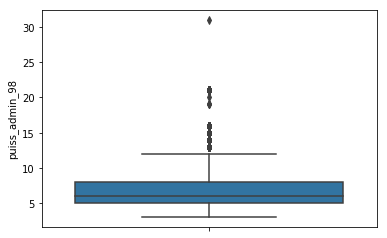

In [624]:
sns.boxplot(y=df["puiss_admin_98"])

(array([7.9180e+03, 8.5230e+03, 1.4281e+04, 2.7720e+03, 4.1730e+03,
        2.1340e+03, 1.0530e+03, 8.6600e+02, 1.3400e+02, 3.0000e+02,
        0.0000e+00, 3.0000e+00, 2.1700e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 3. ,  4.4,  5.8,  7.2,  8.6, 10. , 11.4, 12.8, 14.2, 15.6, 17. ,
        18.4, 19.8, 21.2, 22.6, 24. , 25.4, 26.8, 28.2, 29.6, 31. ]),
 <a list of 20 Patch objects>)

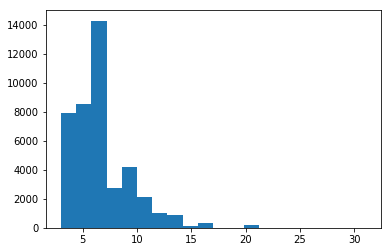

In [625]:
plt.hist(df["puiss_admin_98"],bins=20)

In [626]:
(df["puiss_admin_98"] > 30).sum()

1

**Etude de 'typ_boite_nb_rapp'**

In [627]:
print(df["typ_boite_nb_rapp"].value_counts())
print(df["typ_boite_nb_rapp"].isnull().sum())

M 5    16144
M 6    15992
A 6     8863
A 4      493
A 8      380
A 5      368
D 5      115
A 7       10
V 0        5
D 6        4
S 6        1
Name: typ_boite_nb_rapp, dtype: int64
0


In [628]:
print(df.shape)
df = df.loc[~((df["typ_boite_nb_rapp"] == "V 0")|(df["typ_boite_nb_rapp"] == "S 6"))]
print(df.shape)

(42375, 33)
(42369, 33)


In [629]:
print(df["typ_boite_nb_rapp"].value_counts())

M 5    16144
M 6    15992
A 6     8863
A 4      493
A 8      380
A 5      368
D 5      115
A 7       10
D 6        4
Name: typ_boite_nb_rapp, dtype: int64


In [630]:
print(df.shape)
df["typ_boite"] = df["typ_boite_nb_rapp"].str[0]
df["nb_rapp"] = df["typ_boite_nb_rapp"].str[2]
print(df.shape)

print(df[["typ_boite","nb_rapp"]].head())

(42369, 33)
(42369, 35)
  typ_boite nb_rapp
0         M       6
1         M       6
2         M       6
4         M       6
6         M       6


In [631]:
print(df.shape)
df = df.drop(["typ_boite_nb_rapp"], axis = 1)
print(df.shape)


(42369, 35)
(42369, 34)


**Etude des consos : ("conso_urb","conso_exurb","conso_mixte")**

In [633]:
print(df[["conso_urb","conso_exurb","conso_mixte"]].describe())
print(df[["conso_urb","conso_exurb","conso_mixte"]].isnull().sum())

          conso_urb   conso_exurb   conso_mixte
count  42369.000000  42369.000000  42369.000000
mean       6.306491      4.391388      5.083575
std        1.847801      0.817115      1.160692
min        0.000000      2.900000      1.800000
25%        4.900000      3.800000      4.200000
50%        6.000000      4.300000      4.900000
75%        7.600000      4.900000      5.900000
max       15.800000      8.400000     10.700000
conso_urb      0
conso_exurb    0
conso_mixte    0
dtype: int64


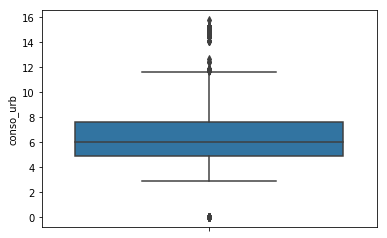

In [634]:
sns.boxplot(y=df["conso_urb"])

In [635]:
print((df["conso_urb"] < 1).sum())
print(df.shape)
df = df.loc[df["conso_urb"] > 1]
print(df.shape)

30
(42369, 34)
(42339, 34)


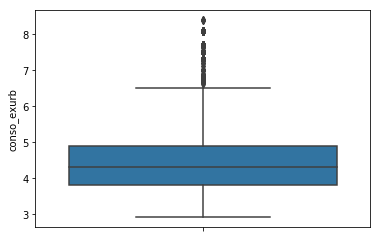

In [636]:
sns.boxplot(y=df["conso_exurb"])

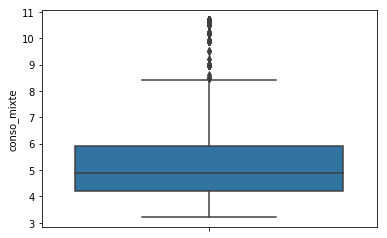

In [637]:
sns.boxplot(y=df["conso_mixte"])

**Etude des résultats d'essai : ("co_typ_1","nox","ptcl")**

In [638]:
print(df[["co_typ_1","nox","ptcl"]].describe())
print(df[["co_typ_1","nox","ptcl"]].isnull().sum())

           co_typ_1           nox          ptcl
count  42339.000000  42339.000000  33099.000000
mean       0.302117      0.098326      0.000742
std        0.142965      0.062209      0.000802
min        0.056000      0.001000      0.000000
25%        0.212000      0.027000      0.000000
50%        0.273000      0.120000      0.001000
75%        0.348000      0.147000      0.001000
max        0.931000      0.259000      0.010000
co_typ_1       0
nox            0
ptcl        9240
dtype: int64


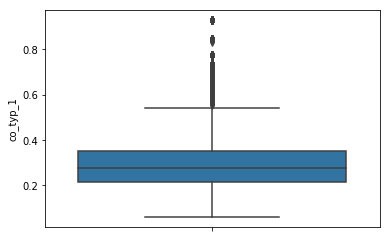

In [639]:
sns.boxplot(y=df["co_typ_1"])

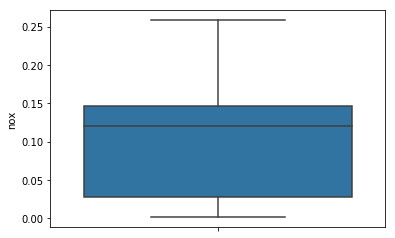

In [640]:
sns.boxplot(y=df["nox"])

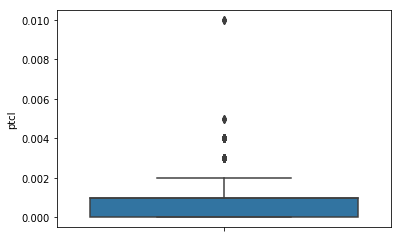

In [641]:
sns.boxplot(y=df["ptcl"])

**Etude de la Carosserie **

In [642]:
print(df["Carrosserie"].value_counts())
print(df["Carrosserie"].isnull().sum())

BERLINE                18135
BREAK                   6478
MONOSPACE COMPACT       5706
TS TERRAINS/CHEMINS     4107
COMBISPACE              2691
COUPE                   1536
MINIBUS                 1331
CABRIOLET                869
MINISPACE                860
MONOSPACE                626
Name: Carrosserie, dtype: int64
0


**Etude de la gamme**

In [643]:
print(df["gamme"].value_counts())
print(df["gamme"].isnull().sum())

INFERIEURE        16460
MOY-INFER         15054
MOY-SUPER          5601
SUPERIEURE         3695
ECONOMIQUE         1124
LUXE                374
MOY-INFERIEURE       31
Name: gamme, dtype: int64
0


**Conclusion**

In [644]:
print(df.shape)
print(df.columns)

(42339, 34)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Country', 'Mp',
       'Mh', 'Man', 'MMS', 'Tan', 'Cn', 'Ct', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'typ_boite', 'nb_rapp'],
      dtype='object')
